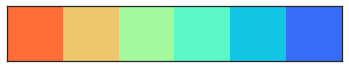

In [162]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel

np.random.seed(666) #just for reaptable results


color = sns.color_palette("rainbow_r", 6) #PiYG
sns.palplot(color)

In [2]:
dfx  = pd.read_excel('./COVID19.xlsx', sheet_name='data')
dfy  = pd.read_excel('./COVID19.xlsx', sheet_name='sample_info')

dfx = dfx[dfx.columns[1:]]
cols = ["p-%s" % c for c in dfx.columns]
dfx.columns = cols

X = dfx.values
Y = pd.get_dummies(dfy['class']).values.astype(float)

mp = AggMap(dfx, metric = 'correlation')

2020-08-17 11:15:58,693 - INFO - [bidd-aggmap] - Calculating distance ...
2020-08-17 11:15:58,696 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 88/88 [00:00<00:00, 1838.25it/s]


## 5-fold cross validation and repeat 5 times 

In [3]:
n_splits = 5 #5-fold reapeat 5 times

run_all = []

for repeat_seed in [8, 16, 32, 64, 128]: #5 repeats random seeds
    outer = KFold(n_splits = n_splits, shuffle = True, random_state = repeat_seed)
    outer_idx = list(outer.split(range(len(Y))))
    
    for c in [1, 3, 5]: 
        
        mp = mp.fit(cluster_channels = c, verbose = 0)
        for i, idx in enumerate(outer_idx):
            
            train_idx, valid_idx = idx
            fold_num = "fold_%s" % str(i+1).zfill(2) 
            
            validY = Y[valid_idx]
            validx = X[valid_idx]

            trainx = X[train_idx]
            trainY = Y[train_idx]

            trainX = mp.batch_transform(trainx, scale_method = 'standard')
            validX = mp.batch_transform(validx, scale_method = 'standard')
            print("\n input train and test X shape is %s, %s " % (trainX.shape,  validX.shape))
            clf = AggModel.MultiClassEstimator(epochs = 200,  verbose = 0)
            clf.fit(trainX, trainY, X_valid = validX, y_valid = validY)

            history = clf.history.history
            history['fold'] = fold_num
            history['c'] = c
            history['repeat_seed'] = repeat_seed
            
            run_all.append(history)

2020-08-17 11:16:00,424 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:16:03,257 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:16:03,272 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 4411.24it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 4471.41it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2332.20it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2010.45it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1108.39it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:18:34,917 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:18:35,213 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:18:35,233 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1159.11it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 1908.30it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2064.00it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1647.59it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1300.07it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:21:39,881 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:21:40,178 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:21:40,198 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1078.93it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 1244.84it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2585.02it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1455.69it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1022.71it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:24:53,830 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:24:54,039 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:24:54,051 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 3386.96it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 3033.87it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3853.39it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3837.76it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4311.92it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:26:42,463 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:26:42,672 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:26:42,685 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1565.86it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 4372.94it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4254.28it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4358.66it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4334.89it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:28:41,904 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:28:42,114 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:28:42,131 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 2191.30it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 4177.31it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4281.05it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3837.62it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4227.71it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:30:52,770 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:30:52,981 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:30:52,993 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 4463.98it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 3075.06it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4249.01it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4331.34it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4368.31it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:32:41,958 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:32:42,165 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:32:42,177 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 4312.70it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 4383.89it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1670.83it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4348.43it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3912.90it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:34:42,239 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:34:42,448 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:34:42,462 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 3923.78it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 3931.28it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4283.79it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3713.96it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2378.25it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:36:53,065 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:36:53,274 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:36:53,287 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 4274.35it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 3970.49it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4299.58it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1818.50it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1392.26it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:39:14,745 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:39:15,055 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:39:15,077 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1295.30it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 1529.41it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1135.62it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3865.07it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1656.75it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:42:24,501 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:42:24,827 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:42:24,848 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 1296.90it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 1371.47it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 2955.30it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1256.04it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1601.73it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:45:53,619 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:45:53,854 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:45:53,877 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 3797.63it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 978.44it/s]



 input train and test X shape is (289, 10, 9, 1), (73, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1284.29it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1075.99it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 928.50it/s]



 input train and test X shape is (290, 10, 9, 1), (72, 10, 9, 1) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:48:40,902 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:48:41,110 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:48:41,123 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 4304.51it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 3382.80it/s]



 input train and test X shape is (289, 10, 9, 3), (73, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3631.91it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4132.94it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3846.27it/s]



 input train and test X shape is (290, 10, 9, 3), (72, 10, 9, 3) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)
2020-08-17 11:50:41,216 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2020-08-17 11:50:41,426 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-08-17 11:50:41,443 - INFO - [bidd-aggmap] - Finished


100%|##########| 73/73 [00:00<00:00, 3376.57it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 73/73 [00:00<00:00, 4353.16it/s]



 input train and test X shape is (289, 10, 9, 5), (73, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 3895.14it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 1605.03it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


100%|##########| 72/72 [00:00<00:00, 4307.37it/s]



 input train and test X shape is (290, 10, 9, 5), (72, 10, 9, 5) 
MultiClassEstimator(batch_size=128, conv1_kernel_size=11, dense_avf='relu',
                    dense_layers=[128], epochs=200, lr=0.0001, metric='ROC',
                    monitor='val_loss', name='AggMap MultiClass Estimator',
                    patience=10000, random_state=32, verbose=0)


In [179]:
dfr = pd.DataFrame(run_all)
dfr.to_csv('./5FCV_valid.csv')

In [154]:
sns.set(style = 'white', font_scale=1.2)

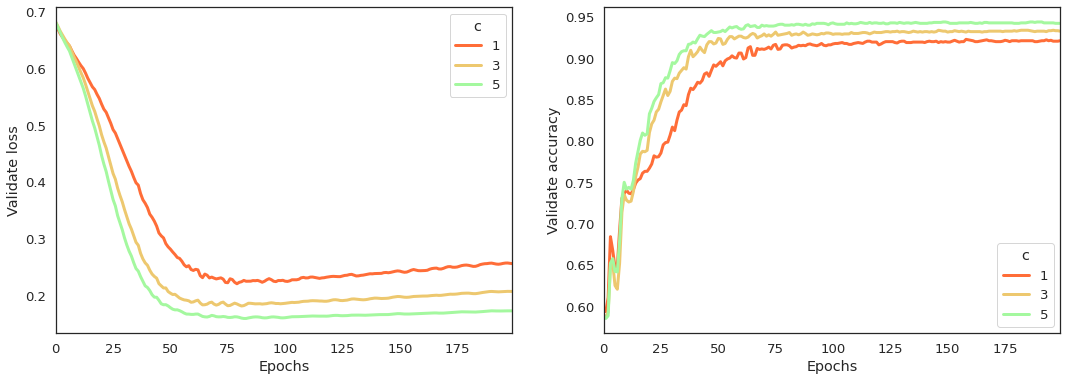

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
loss_mean.plot(ax=ax1, lw = 3, color = color)
ax1.set_ylabel('Validate loss')
ax1.set_xlabel('Epochs')

# for i, j in zip(loss_mean.columns, color[:3]):
#     bottom = loss_mean[i]-loss_std[i]
#     up = loss_mean[i] + loss_std[i]
#     ax1.fill_between(loss_mean.index, bottom, up,alpha=0.2, color = j)

#plt.savefig(os.path.join(results_save_folder, 'performance_01_test.png'), bbox_inches='tight', dpi=300)

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T
acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validate accuracy')
ax2.set_xlabel('Epochs')

plt.savefig('5FCV_valid.png', bbox_inches='tight', dpi=300)